In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv", index_col = 0)
test = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv", index_col = 0)

In [3]:
train.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
train.shape

(10407, 12)

In [5]:
train_columns = list(train.columns)
train_columns

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

In [6]:
test.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
id,,,,,,,,,,,
10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


# 1. Time for some EDA

## 1.1 Check out the basic statistics and check for null values

In [7]:
desc = pd.DataFrame(index = list(train))
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T], axis = 1)
desc

,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
allelectrons_Total,325,3.122898,0,float64,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000
density_Total,1099,10.560200,0,float64,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804
allelectrons_Average,629,6.044009,0,float64,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,205,1.969828,0,float64,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000
atomicweight_Average,849,8.157971,0,float64,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,898,8.628808,0,float64,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810
el_neg_chi_Average,745,7.158643,0,float64,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,737,7.081772,0,float64,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000
R_cov_element_Average,698,6.707024,0,float64,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840
zaratio_Average,815,7.831267,0,float64,10407.0,0.493349,0.063080,0.0,0.476196,0.488550,0.496070,0.825990


Based on this, we can conclude that there no 'null' values in any of the variables. This is weird. Maybe we can look for number of '0's instead.

In [8]:
zero_counts = {}
for column in train.columns:
    zero_counts[column] = train.loc[train[column]==0, column].count()

In [9]:
zero_df = pd.DataFrame([zero_counts])

In [10]:
zero_df = zero_df.T
desc = desc.join(zero_df, how='inner')

In [11]:
desc = desc.rename(columns = {0:'0 counts'})
desc

,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max,0 counts
allelectrons_Total,325,3.122898,0,float64,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000,76
density_Total,1099,10.560200,0,float64,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804,54
allelectrons_Average,629,6.044009,0,float64,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000,76
val_e_Average,205,1.969828,0,float64,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000,71
atomicweight_Average,849,8.157971,0,float64,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000,77
ionenergy_Average,898,8.628808,0,float64,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810,73
el_neg_chi_Average,745,7.158643,0,float64,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000,67
R_vdw_element_Average,737,7.081772,0,float64,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000,68
R_cov_element_Average,698,6.707024,0,float64,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840,77
zaratio_Average,815,7.831267,0,float64,10407.0,0.493349,0.063080,0.0,0.476196,0.488550,0.496070,0.825990,62


Based on this new table, we can see that there are many 0 values. We can consider replacing them with the mean/median.

## 1.2 Distribution of target variable 'Hardness'

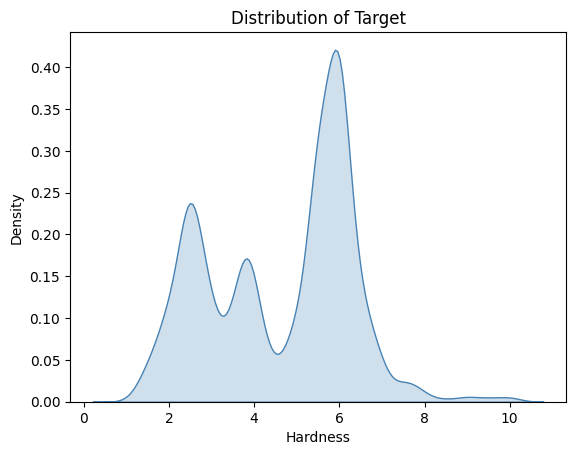

In [12]:
sns.kdeplot(data = train, x = 'Hardness', fill = True, color = 'steelblue').set_title('Distribution of Target');

Based on this kdeplot, we can conclude:
* There are three peaks at 2.3, 3.8 and 6
* There are no outliers

## 1.3  Let's explore the relationship between the independent variables and 'Hardness'. We will be plotting 3 scatter plots at a time.

### 1.3.1 We first explore 'allelectron_Total', 'density_Total' and 'allelectrons_Average‘.

<Axes: xlabel='allelectrons_Average', ylabel='Hardness'>

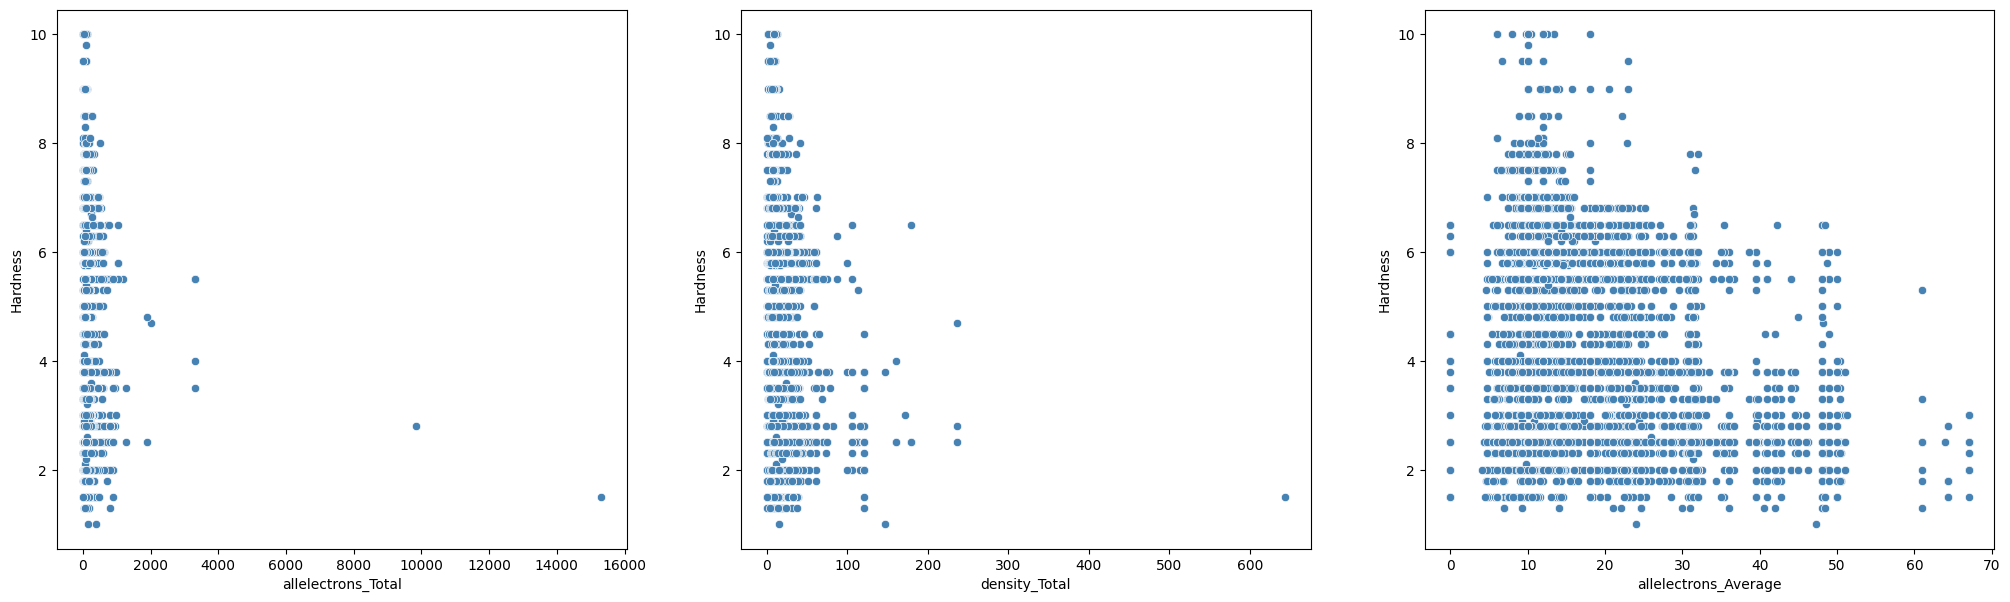

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'allelectrons_Total', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'density_Total', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'allelectrons_Average', y = 'Hardness', color = 'steelblue')

Based on these 3 scatter plots:
* We notice that 'allelectron_Total' and 'density_Total' have high leverage points. Need to further investigate if they are influential points
* There are no strong linear r/s between these three independent variables and 'Hardness'

### 1.3.2 We next explore 'val_e_Average', 'atomicweight_Average' and 'ionenergy_Average‘.

<Axes: xlabel='ionenergy_Average', ylabel='Hardness'>

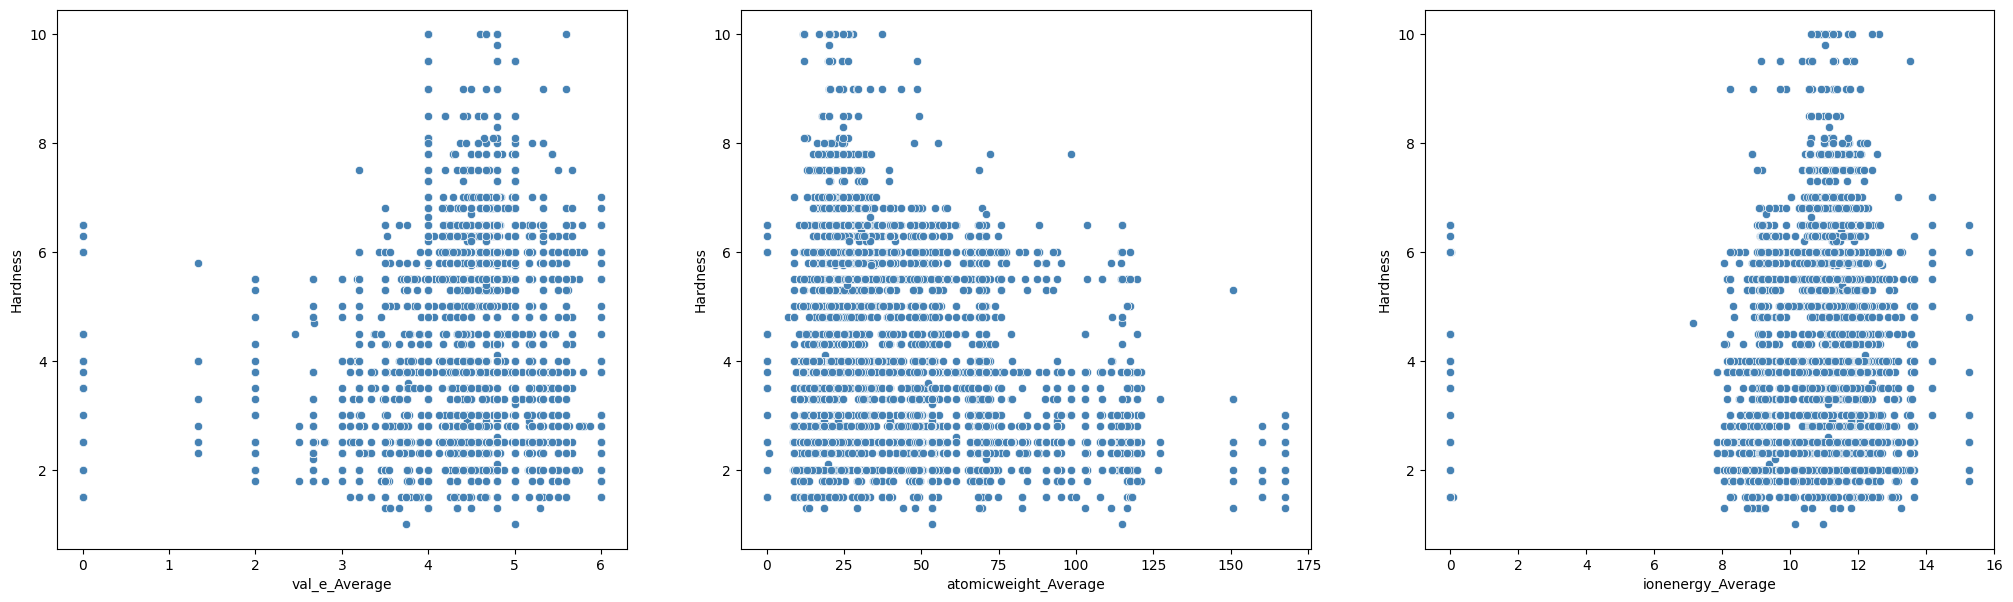

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'val_e_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'atomicweight_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'ionenergy_Average', y = 'Hardness', color = 'steelblue')

Based on these 3 scatter plots:
* There are no high leverage points. 
* There are no strong linear r/s between these three independent variables and 'Hardness'

### 1.3.3 We next explore 'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average'

<Axes: xlabel='R_cov_element_Average', ylabel='Hardness'>

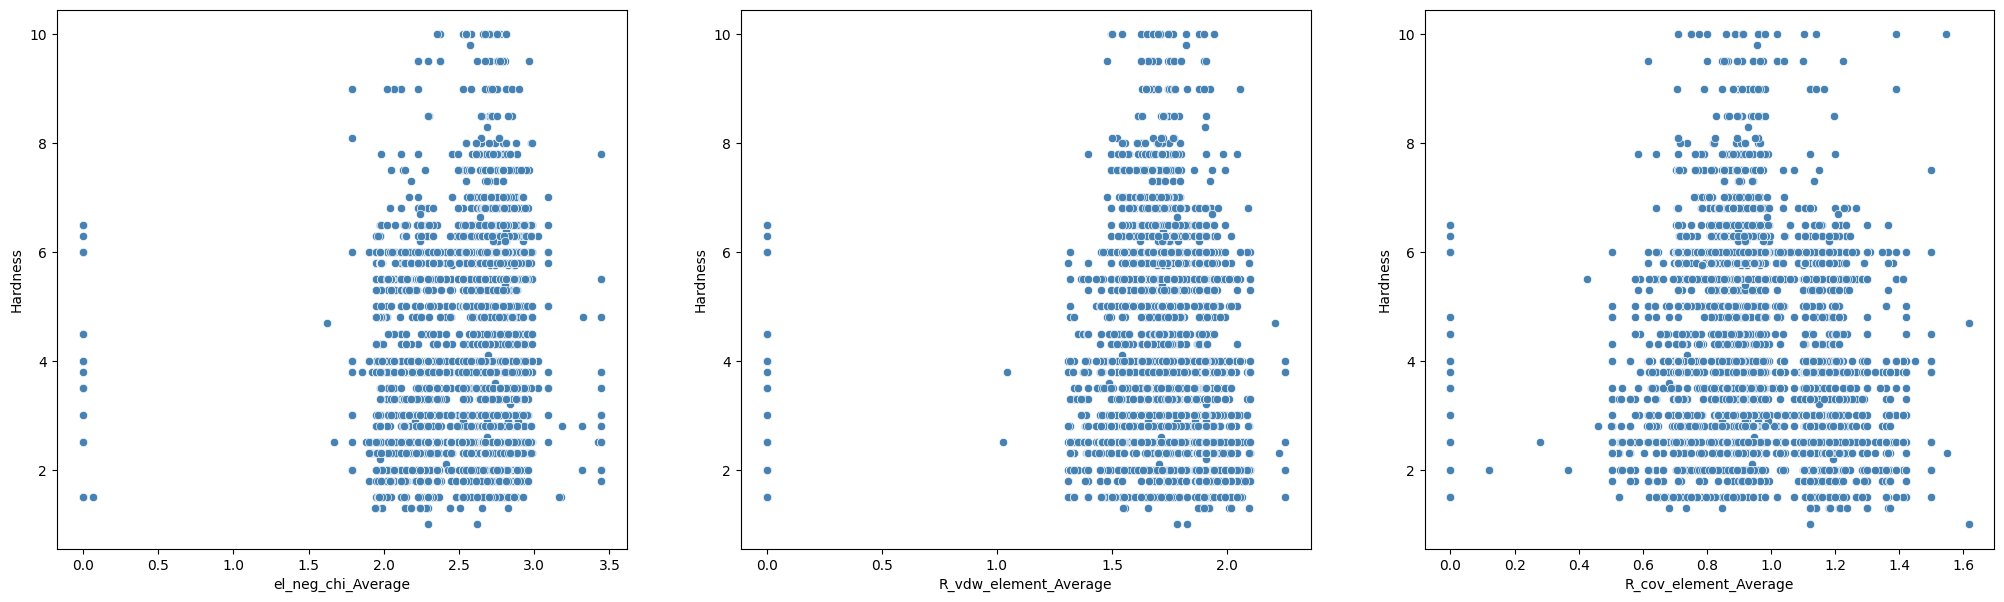

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'el_neg_chi_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'R_vdw_element_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'R_cov_element_Average', y = 'Hardness', color = 'steelblue')

Similar to before, we can observe:
* There are no high leverage points. 
* There are no strong linear r/s between these three independent variables and 'Hardness'

### 1.3.4 Lastly, we can explore 'zaratio_Average' and 'density_Average'

<Axes: xlabel='density_Average', ylabel='Hardness'>

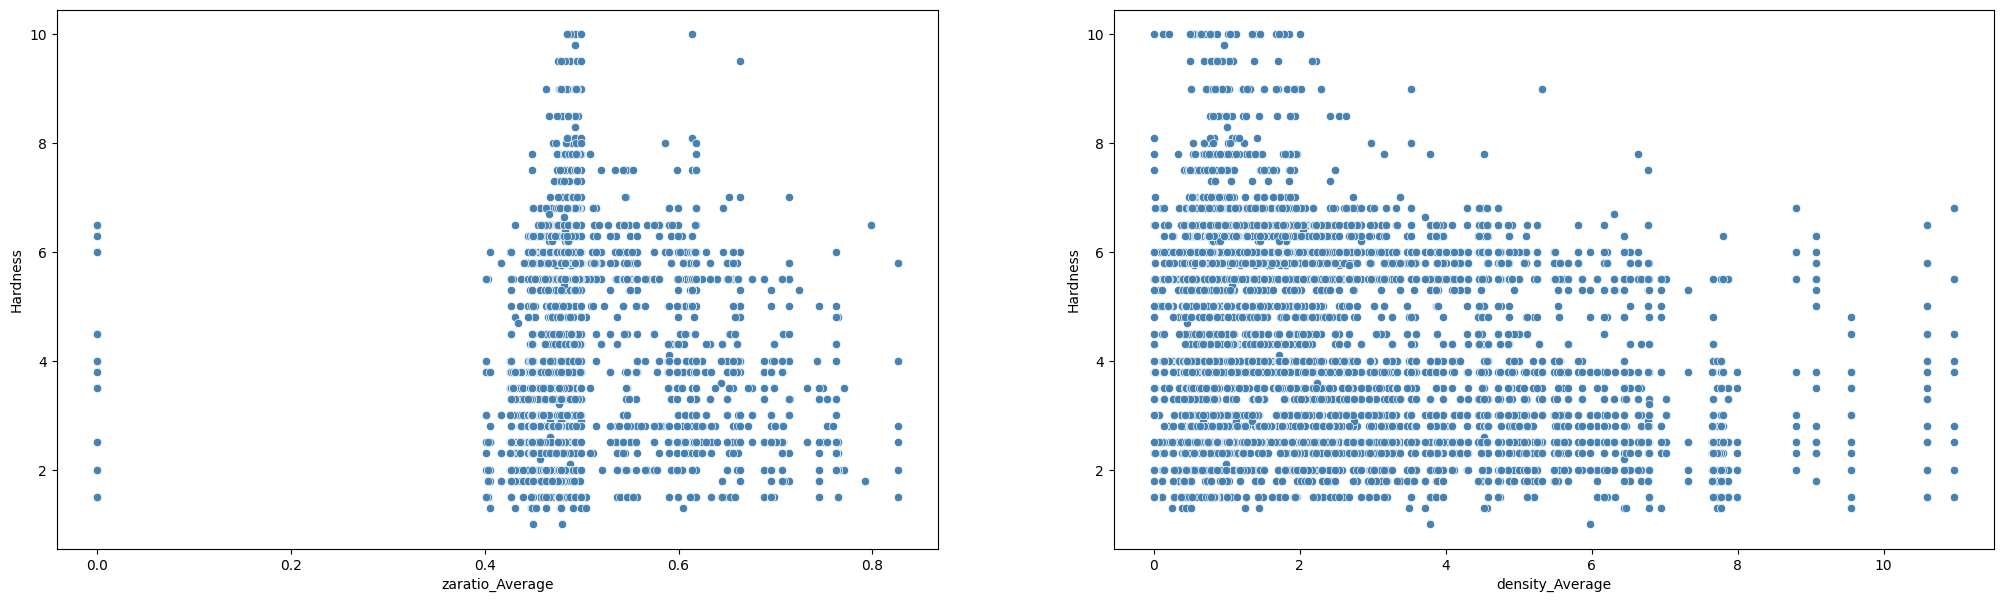

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'zaratio_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'density_Average', y = 'Hardness', color = 'steelblue')

Similar to before, we can observe:
* There are no high leverage points. 
* There are no strong linear r/s between these three independent variables and 'Hardness'

## 1.4 Let's explore the distribution of the independent variables using histograms

array([[<Axes: title={'center': 'allelectrons_Total'}>,
        <Axes: title={'center': 'density_Total'}>,
        <Axes: title={'center': 'allelectrons_Average'}>],
       [<Axes: title={'center': 'val_e_Average'}>,
        <Axes: title={'center': 'atomicweight_Average'}>,
        <Axes: title={'center': 'ionenergy_Average'}>],
       [<Axes: title={'center': 'el_neg_chi_Average'}>,
        <Axes: title={'center': 'R_vdw_element_Average'}>,
        <Axes: title={'center': 'R_cov_element_Average'}>],
       [<Axes: title={'center': 'zaratio_Average'}>,
        <Axes: title={'center': 'density_Average'}>,
        <Axes: title={'center': 'Hardness'}>]], dtype=object)

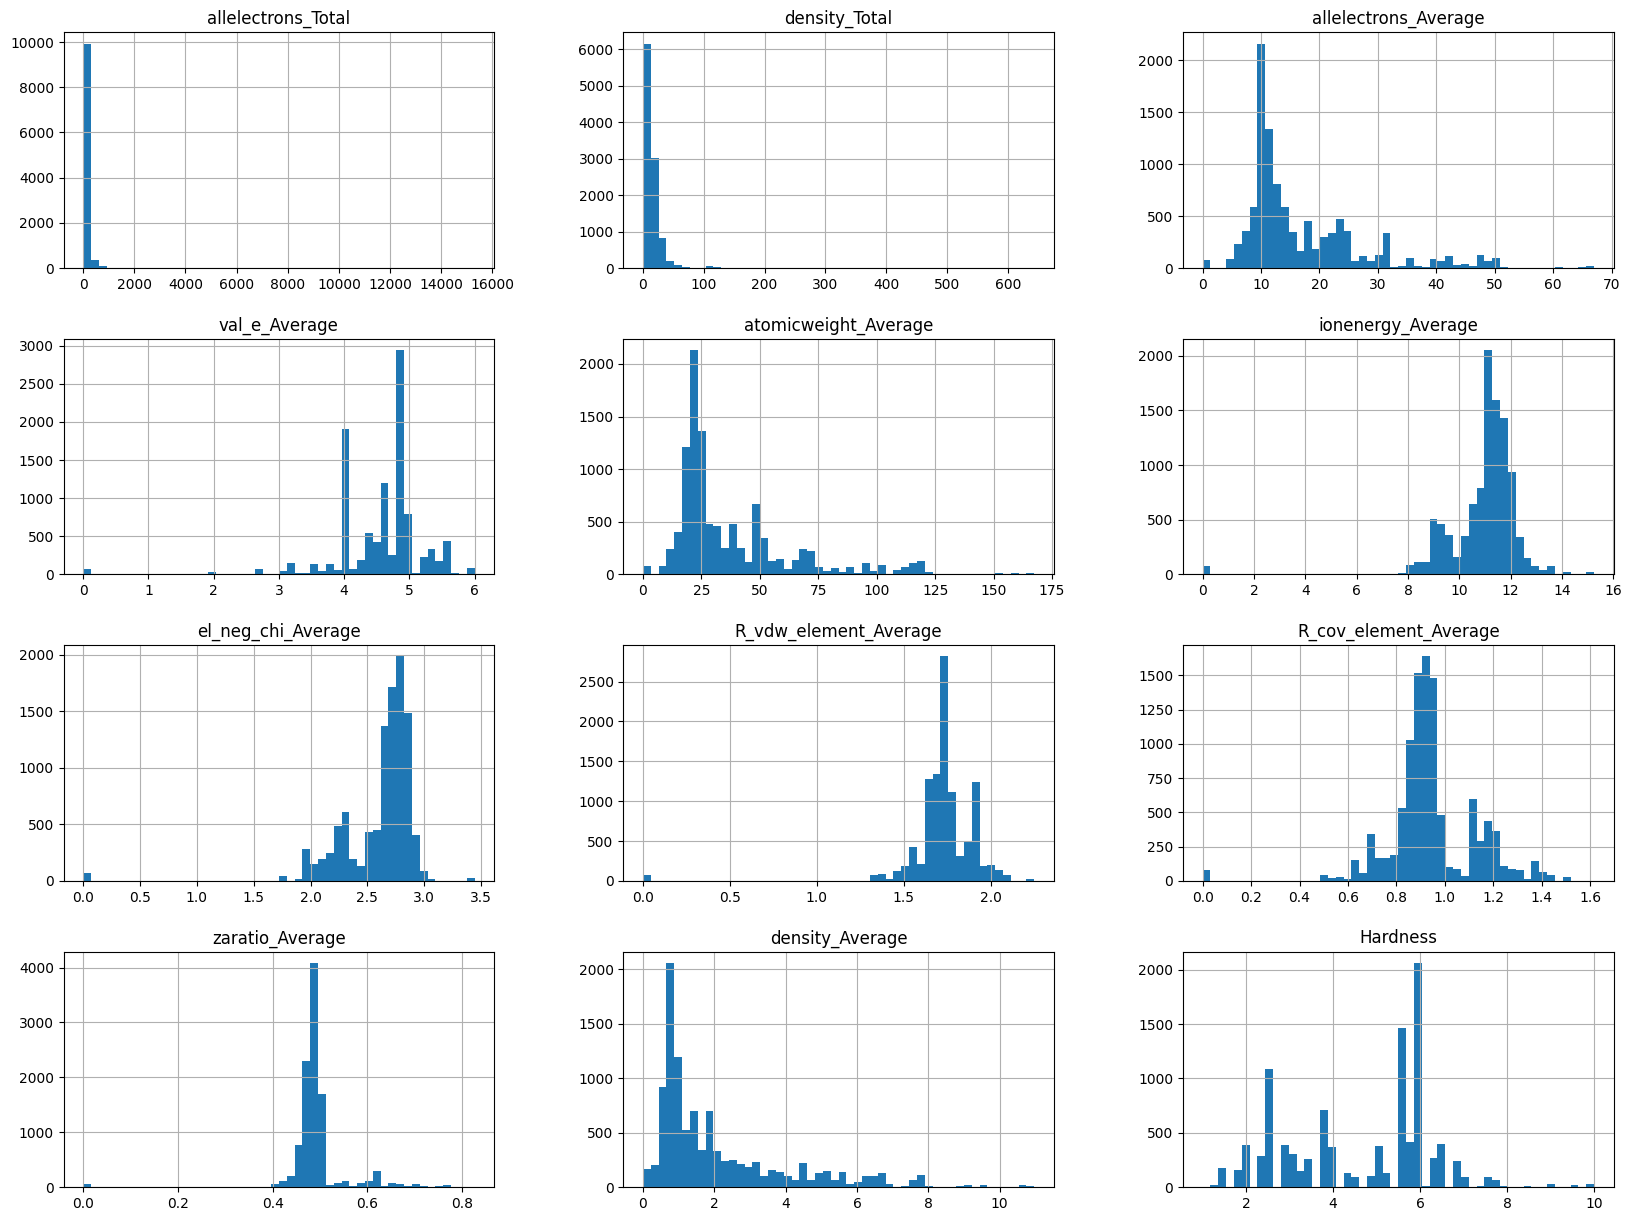

In [17]:
train.hist(bins = 50, figsize = (20,15))

## 1.5 We can create a correlation plot

<Axes: >

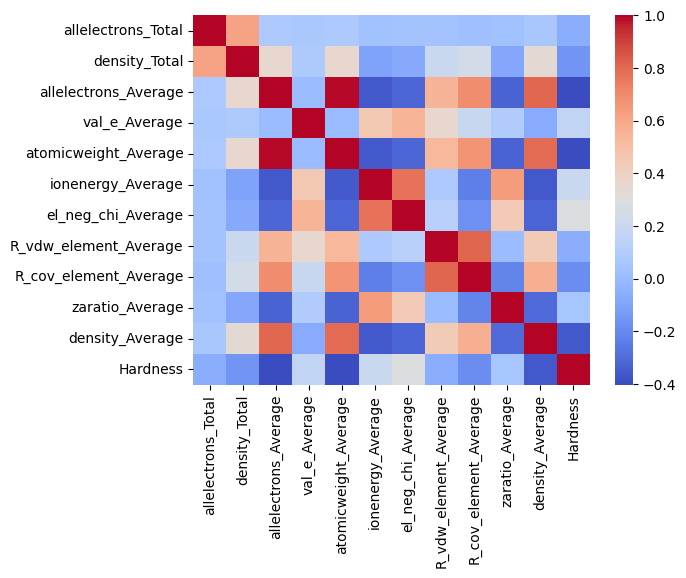

In [18]:
sns.heatmap(train.corr(), cmap = 'coolwarm')

Based on this heatmap, we can observe high correlation between atomicweight_Average and allelectrons_Average. This could lead to multicollinearity issues later on.

# 2. Data Preparation

## 2.1 Replace '0's with the mean/median

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
imputer = SimpleImputer(missing_values = 0, strategy = 'median')
independent_var = [column for column in train.columns if column != 'Hardness']
transformer = ColumnTransformer(transformers=[
    ('num', imputer, independent_var),
], remainder = 'passthrough')
train = transformer.fit_transform(train)
train

array([[100.        ,   0.841611  ,  10.        , ...,   0.49607   ,
          0.91457   ,   6.        ],
       [100.        ,   7.558488  ,  10.        , ...,   0.492719  ,
          0.7176    ,   6.5       ],
       [ 76.        ,   8.885992  ,  15.6       , ...,   0.481478  ,
          1.50633   ,   2.5       ],
       ...,
       [196.        ,  30.92      ,  24.5       , ...,   0.469715  ,
          2.1154    ,   1.8       ],
       [ 38.        ,   1.55316   ,  12.66666667, ...,   0.48650667,
          0.77755   ,   6.        ],
       [288.        ,  24.655328  ,  11.14285714, ...,   0.49391857,
          0.97737   ,   6.5       ]])

In [20]:
train = pd.DataFrame(train, columns = train_columns)
train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


## 2.2 Remove all the high leverage points


In [21]:
var = 'allelectrons_Total'
cutoff = train[var].quantile(0.999)
(train[var] >= cutoff).sum()
train.drop(train[train[var] >= cutoff].index, axis = 0, inplace = True)

In [22]:
var = 'density_Total'
cutoff = train[var].quantile(0.9999)
(train[var] >= cutoff).sum()
train.drop(train[train[var] >= cutoff].index, axis = 0, inplace = True)

In [23]:
var = 'el_neg_chi_Average'
cutoff = train[var].quantile(0.0001)
(train[var] <= cutoff).sum()
train.drop(train[train[var] <= cutoff].index, axis = 0, inplace = True)

In [24]:
var = 'ionenergy_Average'
cutoff = train[var].quantile(0.0001)
(train[var] <= cutoff).sum()
train.drop(train[train[var] <= cutoff].index, axis = 0, inplace = True)

<Axes: xlabel='density_Average', ylabel='Hardness'>

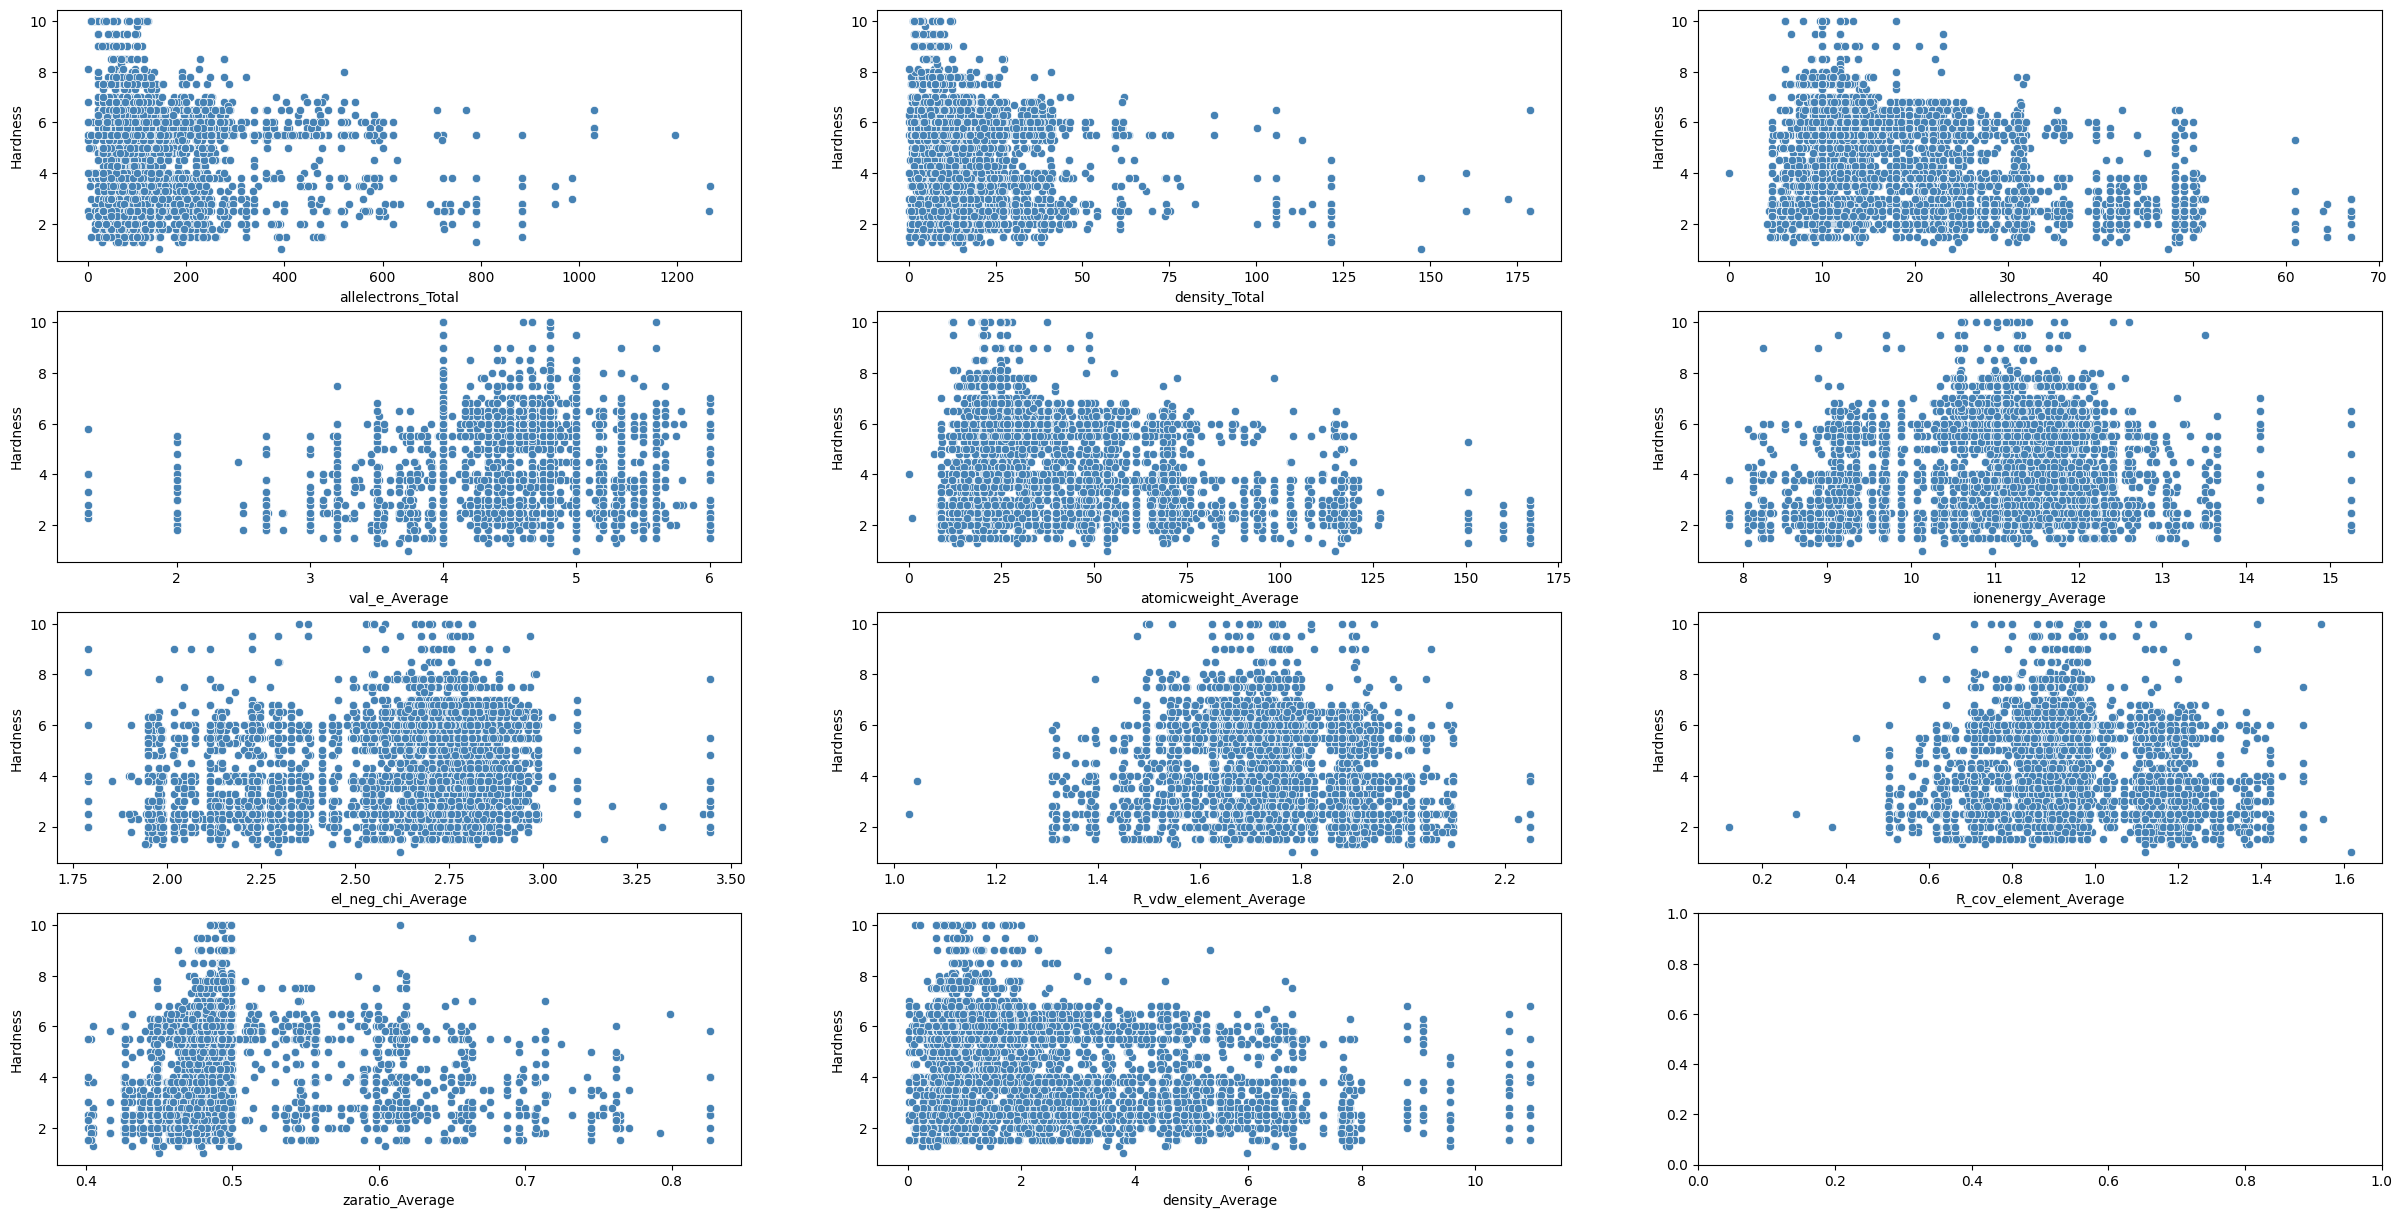

In [25]:
fig, axes = plt.subplots(4, 3, figsize = (30, 15))

sns.scatterplot(ax = axes[0,0], data = train, x = 'allelectrons_Total', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[0,1], data = train, x = 'density_Total', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[0,2], data = train, x = 'allelectrons_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[1,0], data = train, x = 'val_e_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[1,1], data = train, x = 'atomicweight_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[1,2], data = train, x = 'ionenergy_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[2,0], data = train, x = 'el_neg_chi_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[2,1], data = train, x = 'R_vdw_element_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[2,2], data = train, x = 'R_cov_element_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[3,0], data = train, x = 'zaratio_Average', y = 'Hardness', color = 'steelblue')
sns.scatterplot(ax = axes[3,1], data = train, x = 'density_Average', y = 'Hardness', color = 'steelblue')

# 3. Modelling

## 3.1 Splitting into predictor variables (X) and target variable (y)

In [26]:
y = train['Hardness']
X = train.drop(['Hardness'], axis =1)
print(f"The shape of X_train is: {X.shape}")
print(f"The shape of y_train is: {y.shape}")

The shape of X_train is: (10390, 11)
The shape of y_train is: (10390,)


In [27]:
X

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481
...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540
10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755


In [28]:
y

0        6.0
1        6.5
2        2.5
3        6.0
4        6.0
        ... 
10402    4.0
10403    5.0
10404    1.8
10405    6.0
10406    6.5
Name: Hardness, Length: 10390, dtype: float64

## 3.2 Create a RandomForestRegressor model and optimise it using bayesian optimisation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization

### 3.2.1 Create an objective function that we want to maximise

In [30]:
def objective(n_estimators, max_depth):
    model = RandomForestRegressor(n_estimators = int(n_estimators),
                                 max_depth = int(max_depth),
                                 random_state = 42)
    return cross_val_score(model, X, y, cv = 5, scoring = 'neg_median_absolute_error').mean()

### 3.2.2 Create bounds for hyperparamters

In [31]:
param_bounds = {
    'n_estimators': (50, 300),
    'max_depth':(1, 20)
}

### 3.2.3 Optimise

In [32]:
optimizer = BayesianOptimization(f=objective, pbounds = param_bounds, random_state = 42)
optimizer.maximize(init_points=5, n_iter = 10)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | -0.6772   | 8.116     | 287.7     |
| 2         | -0.6374   | 14.91     | 199.7     |
| 3         | -0.7754   | 3.964     | 89.0      |
| 4         | -0.8473   | 2.104     | 266.5     |
| 5         | -0.6451   | 12.42     | 227.0     |
| 6         | -0.6414   | 13.57     | 199.6     |
| 7         | -0.6463   | 20.0      | 179.7     |
| 8         | -0.9692   | 1.0       | 159.9     |
| 9         | -0.6382   | 19.79     | 300.0     |
| 10        | -0.6493   | 20.0      | 50.0      |
| 11        | -0.9762   | 1.0       | 50.0      |
| 12        | -0.6439   | 19.84     | 213.7     |
| 13        | -0.9676   | 1.0       | 215.9     |
| 14        | -0.6457   | 12.02     | 188.0     |
| 15        | -0.6444   | 20.0      | 237.3     |


In [33]:
best_params = optimizer.max['params']
best_params

{'max_depth': 14.907884894416696, 'n_estimators': 199.66462104925915}

## 3.3 Evaluate the model using the optimised model

### 3.3.1 Split the train data into training and validation dataset (80:20 ratio)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)


In [35]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8312, 2078, 8312, 2078)

### 3.3.2 Create a new RandomForestRegressor using the optimised hyperparameters and make predictions based on validation dataset

In [36]:
model = RandomForestRegressor(n_estimators=int(best_params['n_estimators']),
                            max_depth = int(best_params['max_depth']),
                            random_state = 42)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

### 3.3.3 Evaluate using median absolute error

In [37]:
from sklearn.metrics import median_absolute_error
median_ae = median_absolute_error(y_test, y_preds)
median_ae

0.6010924487458476

## 3.4 Make predictions based on the test data

In [38]:
model.fit(X,y)
final_predictions = model.predict(test)

## 3.5 Create submission csv

In [39]:
output = pd.DataFrame({"id":test.index,
                      "Hardness":final_predictions})
output.to_csv("submission.csv", index = False)